In [1]:
from skeLCS import StringEnumerator
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

#Initialize StringEnumerator object with csv filepath and class label.
converter = StringEnumerator(r"C:\Users\jowen\Desktop\College\Graduate courses\Research\skeLCS\Iris\iris.csv","class")


converter.add_class_converter_random()

'''
Convert all attributes using convert_all_attributes(). Note: this is NOT a standalone method. This method
just puts all of the changes made above "into stone". This method does not automatically convert anything for you. You
MUST call this method if data transformation operations were invoked (any of the class/attributeConverter methods
above), or you will not see any changes when you call get_params().
'''
converter.convert_all_attributes()

#Get arrays using get_params()
headers,classLabel,dataFeatures,dataPhenotypes = converter.get_params()

dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)

print("Data Features")
print(dataFeatures)
print("\nData test Features")
print(dataFeatures_test)
print("\nData train Features")
print(dataFeatures_train)

print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData test Phenotypes array")
print(DataPhenotypes_test)
print("\nData train Phenotypes array")
print(DataPhenotypes_train)

print("\nData Headers")
print(headers)

Data Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

In [2]:
np.shape(dataFeatures_test)

(38, 4)

In [3]:
from skeLCS import eLCS

model = eLCS()

In [4]:
model = eLCS(learning_iterations = 5000,nu = 10)

In [5]:
#Initialize and train model
model = eLCS(learning_iterations = 5000,track_accuracy_while_fit=True)
trainedModel = model.fit(dataFeatures_train,dataPhenotypes_train)

trainedModel

eLCS(learning_iterations=5000, track_accuracy_while_fit=True)

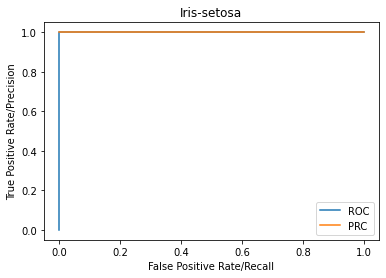

PRC AUC:1.0
ROC AUC:1.0


In [6]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataPhenotypes_test[:,0], probs[:, 0])
prec1, recall1, thresholds1 = precision_recall_curve(DataPhenotypes_test[:,0], probs[:, 0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Iris-setosa')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

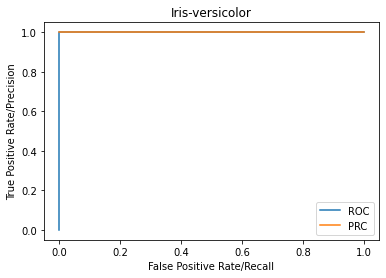

PRC AUC:0.9999999999999998
ROC AUC:1.0


In [7]:
fpr2, tpr2, thresholds2 = roc_curve(DataPhenotypes_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(DataPhenotypes_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.title('Iris-versicolor')
plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

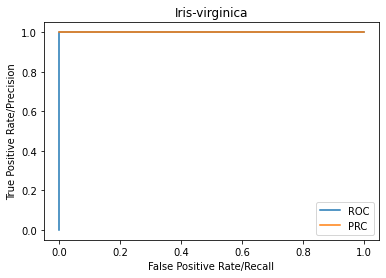

PRC AUC:0.9999999999999998
ROC AUC:1.0


In [8]:
fpr3, tpr3, thresholds3 = roc_curve(DataPhenotypes_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(DataPhenotypes_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.title('Iris-virginica')
plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [9]:
trainedModel.export_iteration_tracking_data("iterationData_Iris_LCS.csv")

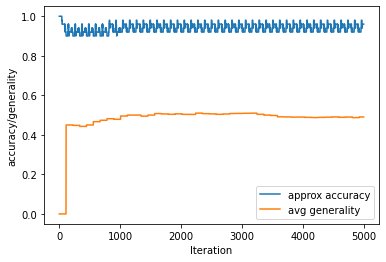

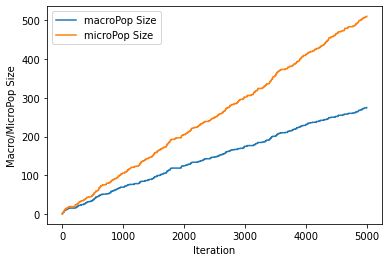

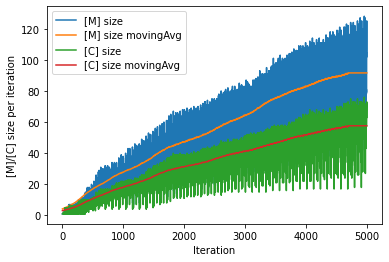

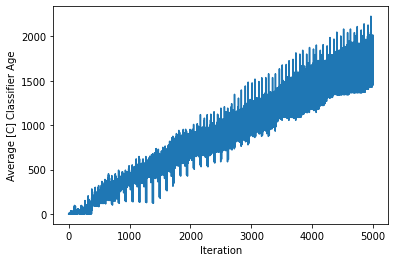

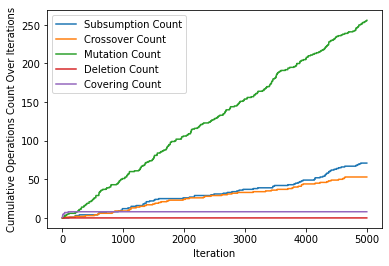

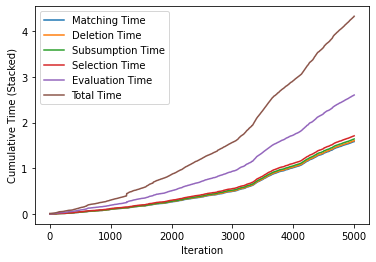

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_Iris_LCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [12]:
trainedModel.export_final_rule_population(headers,classLabel,filename="RulePopulationIris.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationIris.csv")
display(populationData2)

,sepal length,sepal width,petal length,petal width,class,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,#,"2.441,3.9590000000000005","4.307,7.493","1.6519999999999997,2.948",2.0,0.743539,0.942455,4,170.485532,4994,0,0.75,NaN,1474,1564
1,#,"1.6189999999999998,3.181",#,"0.364,1.6360000000000001",1.0,0.559482,0.890343,9,178.315047,4996,1,0.50,NaN,1429,1605
2,#,"2.538,3.462",#,"-0.5680000000000001,0.968",0.0,1.000000,1.000000,3,193.668023,4997,3,0.50,NaN,891,891
3,#,"3.7699999999999996,4.43",#,#,0.0,0.286148,0.778607,1,147.071716,4922,7,0.25,NaN,313,402
4,#,"2.818,4.182","0.5329999999999999,2.067","-0.468,1.068",0.0,1.000000,1.000000,1,180.754636,4997,11,0.75,NaN,1603,1603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,#,#,#,"-0.02400000000000002,1.188",0.0,0.439765,0.848485,1,175.084400,4997,4922,0.25,NaN,28,33
271,"6.388856433555849,7.168","2.441,3.9590000000000005","2.216792307336812,10.580184316205717","1.6519999999999997,2.948",2.0,0.647228,0.916667,1,169.926328,4928,4928,1.00,NaN,11,12
272,#,#,"2.576,5.2175",#,1.0,0.534825,0.882353,1,177.941829,4996,4957,0.25,NaN,15,17
273,"5.598,7.002",#,#,"-0.1434591549641301,1.6360000000000001",1.0,1.000000,1.000000,1,180.191360,4996,4957,0.50,NaN,9,9


In [14]:
trainedModel.export_final_rule_population(headers,classLabel,filename="RulePopulationIris2.csv")

populationData3 = pd.read_csv("RulePopulationIris2.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,class,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"[2.441,3.9590000000000005], [4.307,7.493], [1....","sepal width, petal length, petal width",2.0,0.743539,0.942455,4,170.485532,4994,0,0.75,NaN,1474,1564
1,"[1.6189999999999998,3.181], [0.364,1.636000000...","sepal width, petal width",1.0,0.559482,0.890343,9,178.315047,4996,1,0.50,NaN,1429,1605
2,"[2.538,3.462], [-0.5680000000000001,0.968]","sepal width, petal width",0.0,1.000000,1.000000,3,193.668023,4997,3,0.50,NaN,891,891
3,"[3.7699999999999996,4.43]",sepal width,0.0,0.286148,0.778607,1,147.071716,4922,7,0.25,NaN,313,402
4,"[2.818,4.182], [0.5329999999999999,2.067], [-0...","sepal width, petal length, petal width",0.0,1.000000,1.000000,1,180.754636,4997,11,0.75,NaN,1603,1603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,"[-0.02400000000000002,1.188]",petal width,0.0,0.439765,0.848485,1,175.084400,4997,4922,0.25,NaN,28,33
271,"[6.388856433555849,7.168], [2.441,3.9590000000...","sepal length, sepal width, petal length, petal...",2.0,0.647228,0.916667,1,169.926328,4928,4928,1.00,NaN,11,12
272,"[2.576,5.2175]",petal length,1.0,0.534825,0.882353,1,177.941829,4996,4957,0.25,NaN,15,17
273,"[5.598,7.002], [-0.1434591549641301,1.63600000...","sepal length, petal width",1.0,1.000000,1.000000,1,180.191360,4996,4957,0.50,NaN,9,9


<ipython-input-59-9d2d090ebfa9>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


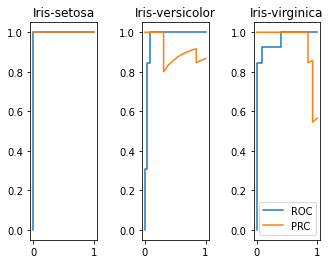

In [59]:
plot1=plt.subplot2grid((1,150),(0,0), colspan=30)
plot2=plt.subplot2grid((1,150),(0,50), colspan=30)
plot3=plt.subplot2grid((1,150),(0,100), colspan=30)

plot1.set_title('Iris-setosa')
plot1.plot(fpr1,tpr1,label="ROC")
plot1.plot(recall1,prec1,label="PRC")

plot2.set_title('Iris-versicolor')
plot2.plot(fpr2,tpr2,label="ROC")
plot2.plot(recall2,prec2,label="PRC")

plot3.set_title('Iris-virginica')
plot3.plot(fpr3,tpr3,label="ROC")
plot3.plot(recall3,prec3,label="PRC")

plt.tight_layout()
plt.legend()
plt.show()
